## Setup evnironment

In [2]:
import os
import numpy as np
import pandas as pd
import json
from skimage.io import imread

In [3]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

In [4]:
from psf import compute, plotPSF

## Setup plotting

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

## Define parameters

In [6]:
FOVumLat = 109.85
FOVpxLat = 500.0
pxPerUmLat = FOVpxLat/FOVumLat
pxPerUmAx = 1.0/0.1633 # 2.0
wavelength = 570
NA = 0.7
windowUm = [4,2,2]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':pxPerUmLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':wavelength, 'NA':NA, 'windowUm':windowUm}
options['thresh'] = .05

In [7]:
options

{'FOVumLat': 109.85,
 'FOVpxLat': 500.0,
 'pxPerUmLat': 4.551661356395084,
 'pxPerUmAx': 6.12369871402327,
 'wavelength': 570,
 'NA': 0.7,
 'windowUm': [4, 2, 2],
 'thresh': 0.05}

## Get PSF

In [8]:
im = imread('F:\\beads_20210714\\tiff_stacks\\beads_run1_HR\\21-07-14 221038_skewed-42_dsf1_allsecs\\crop.tif', plugin='tifffile')   

In [9]:
data, beads, maxima, centers, smoothed = compute(im, options)

In [10]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
latProfile = [x[1] for x in data]
axProfile = [x[2] for x in data]

In [11]:
PSF


,FWHMlat,FWHMax,Max
0,0.591868,1.963810,6771
1,0.609614,1.948342,4781
2,0.628324,1.898410,4434
3,0.569850,1.885054,2890
4,0.619608,1.982276,3621
5,0.587970,1.942704,3513
6,0.614768,1.988139,6009
7,0.601478,1.801369,6334
8,0.572946,1.951117,5447
9,0.543083,1.936333,16824


In [12]:
print(len(PSF))
print(PSF.mean())
print(PSF.std())

56
FWHMlat       0.555787
FWHMax        1.748950
Max        6390.678571
dtype: float64
FWHMlat       0.032863
FWHMax        0.258085
Max        3566.792861
dtype: float64


## Plot max projection

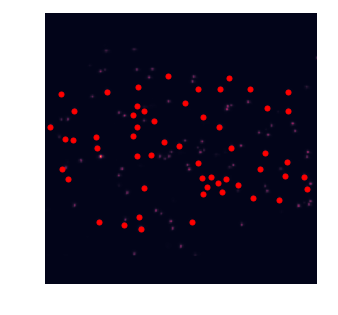

In [13]:
plt.figure(figsize=(5,5));
plt.imshow(smoothed);
plt.plot(centers[:, 2], centers[:, 1], 'r.', ms=10);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off');

## Plot 2D slices

In [14]:
beadInd = 5
average = beads[beadInd]

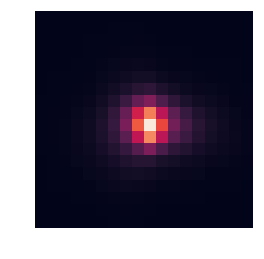

In [15]:
plt.imshow(average.mean(axis=0));
plt.axis('off');

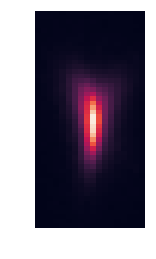

In [16]:
plt.imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

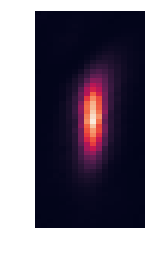

In [17]:
plt.imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

## Plotting

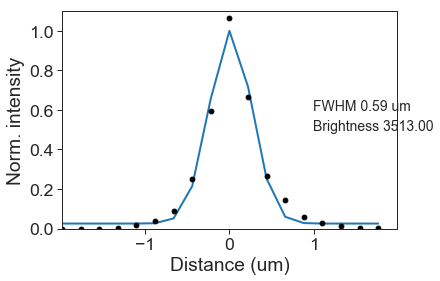

In [18]:
plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])

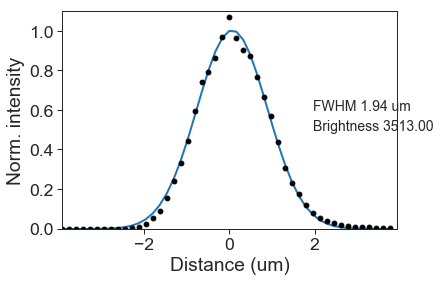

In [19]:
plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])